<a href="https://colab.research.google.com/github/jainaman588/DataScienceProjects/blob/master/kappa_project_assesmentKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from matplotlib.font_manager import FontProperties
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report


In [ ]:
df = pd.read_csv('/content/kappa.txt', sep='\t', header=None)
df[0] = df[0].replace(to_replace =2,value =3)

In [ ]:
y_pred = df[0].values
y_act = df[1].values

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):#Blues
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    font = FontProperties()
    font.set_family('serif')
    font.set_name('Times New Roman')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict ={'fontweight': 20, 'fontsize': 14, 'fontname':'Times New Roman'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)#, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Land Class' , labelpad=5, fontdict ={'fontweight': 20, 'fontsize': 12, 'fontname':'Times New Roman'} )
    plt.xlabel('Predicted Land Class',labelpad=9, fontdict ={'fontweight': 20, 'fontsize': 12, 'fontname':'Times New Roman'} )
    plt.tight_layout()
    plt.savefig('cf.svg' )

Confusion matrix, without normalization
[[ 97  34   6]
 [ 57 144  11]
 [  8   1 129]]


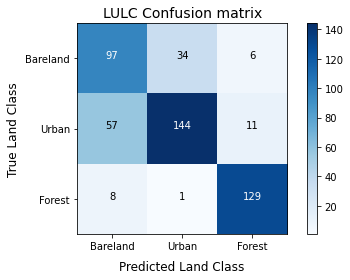

In [ ]:
cnf_matrix = confusion_matrix(y_act, y_pred)
cf_report = classification_report(y_act, y_pred, target_names=['Bareland', 'Urban', 'Forest'], output_dict=True)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Bareland', 'Urban', 'Forest'],
                      title='LULC Confusion matrix')

In [ ]:
print(cf_report)

{'Bareland': {'precision': 0.5987654320987654, 'recall': 0.708029197080292, 'f1-score': 0.6488294314381272, 'support': 137}, 'Urban': {'precision': 0.8044692737430168, 'recall': 0.6792452830188679, 'f1-score': 0.7365728900255755, 'support': 212}, 'Forest': {'precision': 0.8835616438356164, 'recall': 0.9347826086956522, 'f1-score': 0.9084507042253521, 'support': 138}, 'accuracy': 0.7597535934291582, 'macro avg': {'precision': 0.7622654498924663, 'recall': 0.7740190295982706, 'f1-score': 0.7646176752296849, 'support': 487}, 'weighted avg': {'precision': 0.769014080247157, 'recall': 0.7597535934291582, 'f1-score': 0.7605940081633347, 'support': 487}}


In [ ]:
df_cf = pd.DataFrame(cf_report).transpose()

In [ ]:
df_cf.to_csv('cf_report.csv')

Confusion matrix, without normalization
[[ 97  34   6]
 [ 57 144  11]
 [  8   1 129]]


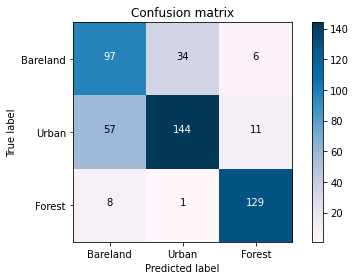

In [ ]:
cnf_matrix = confusion_matrix(y_act, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Bareland', 'Urban', 'Forest'],
                      title='Confusion matrix')

In [ ]:
cohen_kappa_score(y_act, y_pred)

0.6367965119614479

In [ ]:
plt.savefig('confusion_matrix.png', dpi =300 )

<Figure size 432x288 with 0 Axes>

In [ ]:
len(df.loc[df[0]==1])

162